# GROUP 5 SARRIA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()
#df_test.head()


## EXPLORATION

In [75]:
df_train.head()

,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price,num_floor,num_door
0,9255,1.0,1.0,NaN,NaN,1956.0,3º - 1a,False,False,Sant Martí,2.0,True,True,NaN,1096,3.0,NaN
1,1562,4.0,1.0,133.0,west,1960.0,7º - 2a,False,False,Sants,4.0,False,False,2.0,1396,7.0,NaN
2,1671,2.0,3.0,137.0,NaN,2000.0,1º - 1a,False,True,Eixample,0.0,False,False,NaN,1263,1.0,NaN
3,6088,1.0,2.0,-41.0,NaN,2002.0,6º - 1a,False,True,Sants,5.0,False,False,NaN,1290,6.0,NaN
4,6670,2.0,1.0,70.0,NaN,1979.0,5º - 1a,True,False,Gràcia,0.0,False,True,3.0,962,5.0,NaN


In [73]:
# Start the exploration

df_train.describe()

,id,num_rooms,num_baths,square_meters,year_built,num_crimes,num_supermarkets,price,num_floor,num_door
count,8000.000000,8000.000000,7840.000000,7845.000000,7830.000000,7840.000000,1411.000000,8000.000000,7851.000000,0.0
mean,5012.506875,2.868500,1.988265,108.031995,1985.321073,2.803444,1.982991,1099.616250,5.586549,NaN
std,2887.649416,5.300469,0.815943,38.671420,20.591437,3.447714,0.803182,271.686617,2.843474,NaN
min,2.000000,1.000000,1.000000,-100.000000,1950.000000,0.000000,1.000000,195.000000,1.000000,NaN
25%,2512.750000,1.000000,1.000000,78.000000,1968.000000,0.000000,1.000000,905.750000,3.000000,NaN
50%,5014.500000,2.000000,2.000000,110.000000,1985.000000,1.000000,2.000000,1104.000000,6.000000,NaN
75%,7505.250000,4.000000,3.000000,140.000000,2003.000000,6.000000,3.000000,1295.000000,8.000000,NaN
max,10000.000000,97.000000,3.000000,170.000000,2021.000000,10.000000,3.000000,2095.000000,10.000000,NaN


In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8000 non-null   int64  
 1   num_rooms         8000 non-null   float64
 2   num_baths         7840 non-null   float64
 3   square_meters     7845 non-null   float64
 4   orientation       5659 non-null   object 
 5   year_built        7830 non-null   float64
 6   door              7851 non-null   object 
 7   is_furnished      7835 non-null   object 
 8   has_pool          7844 non-null   object 
 9   neighborhood      7835 non-null   object 
 10  num_crimes        7840 non-null   float64
 11  has_ac            7831 non-null   object 
 12  accepts_pets      7845 non-null   object 
 13  num_supermarkets  1411 non-null   float64
 14  price             8000 non-null   int64  
 15  num_floor         7851 non-null   float64
 16  num_door          0 non-null      float64


In [69]:
'''
Before we start the rest of the exploration, we need to format some variables to make it easier and more intuitive.

1. We will extract the variables floor and door from the variable 'door' and format them in a usable way.
2. We will make sure that the variables have consistent labels. 
'''

# We create variables floor and door from the variable 'door'

df_train['num_floor'] = pd.to_numeric(df_train['door'].str.split('º').str[0], errors = 'coerce')
df_train.describe()

print(df_train['door'].unique())
print(df_train['door'].str.split(' '))

df_train['num_door'] = pd.to_numeric(df_train['door'].str.split(' ').str[2].iloc[1], errors = 'coerce')
df_train['num_door'].unique()

['3º - 1a' '7º - 2a' '1º - 1a' '6º - 1a' '5º - 1a' '10º - 2a' '3º - 2a'
 nan '7º - 1a' '2º - 1a' '3º - 4a' '8º - 4a' '4º - 1a' '6º - 4a'
 '10º - 3a' '9º - 3a' '3º - 3a' '6º - 2a' '5º - 2a' '5º - 4a' '6º - 3a'
 '9º - 2a' '8º - 1a' '1º - 2a' '4º - 4a' '5º - 3a' '4º - 2a' '2º - 3a'
 '4º - 3a' '7º - 4a' '9º - 1a' '9º - 4a' '2º - 4a' '8º - 3a' '10º - 1a'
 '10º - 4a' '2º - 2a' '7º - 3a' '1º - 3a' '1º - 4a' '8º - 2a']
0       [3º, -, 1a]
1       [7º, -, 2a]
2       [1º, -, 1a]
3       [6º, -, 1a]
4       [5º, -, 1a]
           ...     
7995    [9º, -, 1a]
7996    [9º, -, 4a]
7997    [9º, -, 3a]
7998    [8º, -, 4a]
7999    [1º, -, 4a]
Name: door, Length: 8000, dtype: object


array([nan])

## IDENTIFY ANOMALIES AND MISSING DATA

id                     0
num_rooms              0
num_baths            160
square_meters        155
orientation         2341
year_built           170
door                 149
is_furnished         165
has_pool             156
neighborhood         165
num_crimes           160
has_ac               169
accepts_pets         155
num_supermarkets    6589
price                  0
floor                149
dtype: int64


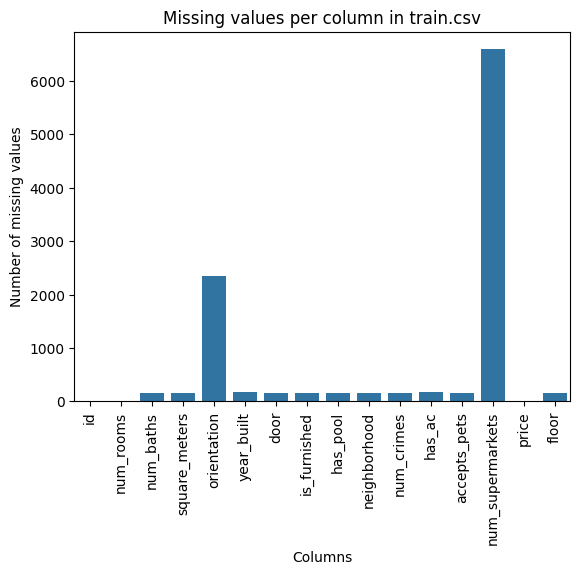

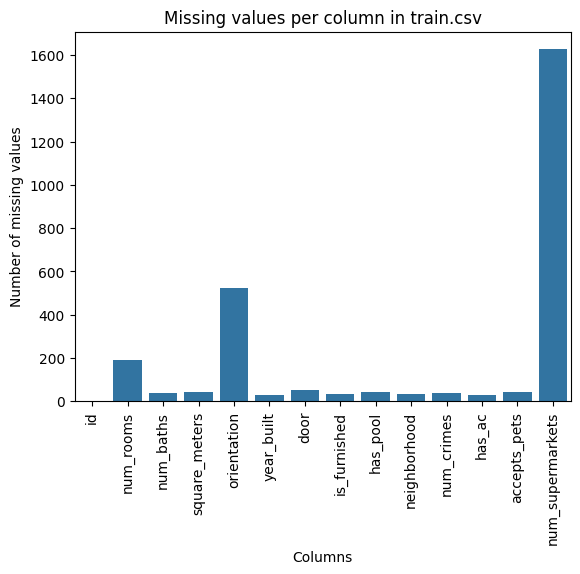

46


In [55]:
# INVESTIGATE WHETHER THE MISSING VALUES ARE AT RANDOM OR NOT

'''
first we will check how many missing values are there in each column of both datasets (train and test)
'''

nas_train = df_train.isnull().sum()
print(nas_train)
sns.barplot(x = nas_train.index, y = nas_train.values)
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.ylabel('Number of missing values')
plt.title('Missing values per column in train.csv')
plt.show()

nas_test = df_test.isnull().sum()
sns.barplot(x = nas_test.index, y = nas_test.values)
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.ylabel('Number of missing values')
plt.title('Missing values per column in train.csv')
plt.show()

'''
Create a bar chart of missing values in the train dataset, grouped by neighborhood.
'''

# Define column names
a_column = 'a'
b_column = 'b'

# Filter rows where 'b' is not missing
df_filtered = df.dropna(subset=[b_column])

# Group the filtered DataFrame by values in 'b' and calculate the count of missing values in 'a'
missing_values_counts = df_filtered.groupby(b_column)[a_column].apply(lambda x: x.isnull().sum()).reset_index()
missing_values_counts.rename(columns={a_column: 'Missing Values Count'}, inplace=True)

# Create a bar plot to display the counts
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_values_counts, x=b_column, y='Missing Values Count', palette='viridis')
plt.title(f'Missing Values Count of {a_column} by {b_column}')
plt.xlabel(b_column)
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45)
plt.show()


sns.barplot(x = )


# NUM_ROOMS
outliers = df_train[df_train['num_rooms'] > 6]
print(len(outliers)) # too many outliers, propose mean imputation per neighborhood



# filling outliers
# distr_means = df_train[df_train['neighborhood']].mean()
# distr_means.plot(kind='bar')

FOR BOOLEANS, REMOVE REFERS TO PAIRWISE DELETION

NUM_BATHROOMS treat identically to num_rooms

SQUARE_METERS a lot of negatives
treat it 3 different ways, 1) remove negatives (just leave values as positives) and then treat outliers with mean imputation, 2) replace with mean per neighborhood, 3) Logical approach

ORIENTATION only relevant in relation to the neighborhood and above a certain floor if it's facing the sea (treat as secondary)

FLOOR treat missing values (by neighborhood)

DOOR the actual door not important but extracting the floor is important

FURNISHED boolean value (secondary), MISSING VALUES REMOVE

HAS POOL boolean value (secondary), MISSING VALUES REMOVE, analyze the effect by neighborhood

NEIGHBORHOOD categorical variable, MISSING VALUES REMOVE, check (secondary check)

NUM_CRIMES ANALYZE PER NEIGHBORHOOD, NEIGHBORHOODS TOO WIDE TREAT CAREFULLY

HAS_AC boolean value, MISSING VALUES REMOVE

ACCEPTS_PETS boolean value, MISSING VALUES REMOVE

NUM_SUPERMARKETS too many missing, JUST REMOVE COLUMN

num_rooms, outliers in > 6, propose removal.

In [1]:
#Ed draft model code


# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split  #split data into training and testing sets
from sklearn.linear_model import LinearRegression #create linear regression model
from sklearn.metrics import mean_squared_error #evaluate the model performance

#Part 1: create model

# Load the train dataset
data = pd.read_csv('train.csv')

# Split the data into features (X) and target (y)
X = data[['neighborhood', 'num_rooms', 'num_baths']] #we need to select the key feature columns 
y = data['price'] #what we want to predict

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression() #LR model created and initialised
model.fit(X_train, y_train) #trained on the training data using the .fit() function

# Make predictions on the test set
y_pred = model.predict(X_test) #via the trained model

#Part 2: Check Model

# Evaluate the model
mse = mean_squared_error(y_test, y_pred) #measure model performance, lower the MSE the better the fit between the predicted and the actual prices.  
print(f"Mean Squared Error: {mse}")

#Part 3 Predict and add apartment prices in the test dataset

# Use trained model to predict prices for apartments in the test dataset
test_data = pd.read_csv('test.csv')  # Load your test dataset
predicted_prices = model.predict(test_data[['neighborhood', 'num_rooms', 'num_baths']])

# Add the predicted prices to the test dataset
test_data['predicted_price'] = predicted_prices

# Save the test dataset with predicted prices to a new CSV file
test_data.to_csv('predicted_apartment_prices.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'apartment_data.csv'

## MODEL RELATED NOTES

Try lasso, ridge and linear model, BEGIN WITH LINEAR